In [923]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [924]:
df = pd.read_csv('Cleaned_Data.csv')
df

,Name,Tweets
0,JustFreshAlerts,prime day deal apple airpods pro sale link gt ...
1,Sneaker Links,troccolivinny be covering major releases full ...
2,JF Kicks Notify,offspringjordan low ie black cementgt shipping...
3,SneakerAlert,air max light madder gs dunk high se tumbled g...
4,Josh Ong,welcome official discord is one discord alphas...
...,...,...
101,CornerstoneDAO,dappsnear nearprotocol cornerstone is expected...
102,Endlesss,ampsider feat mng live tomorrow pm bst twitch ...
103,Connect3,weekly push is cant wait share progress have m...
104,imnotArt🧱,grantyun come whateveroxy samanthacavet superr...


## Vectorize with CountVectorizer and TFIDF

In [925]:
corpus = df.Tweets

In [926]:
#Count Vectorizer

from sklearn.feature_extraction.text import CountVectorizer

count_vec = CountVectorizer(stop_words = 'english', ngram_range = (1,1))
doc_term_count = count_vec.fit_transform(corpus)

In [927]:
#Term Frequency Inverse Document Frequency

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vec = TfidfVectorizer(stop_words = 'english', ngram_range = (1,1))
doc_term_tfidf = tfidf_vec.fit_transform(corpus).toarray()

## Topic Modeling w/ SVD

In [928]:
from sklearn.decomposition import TruncatedSVD

In [929]:
def display_topics(model, feature_names, no_top_words, topic_names = None): 
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix + 1)
        else:
            print("\nTopic: ", topic_names[ix])
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))
    print("\n")
    return model, feature_names, no_top_words

In [930]:
#Topics CountVectorizer
lsa_count = TruncatedSVD(4)
lsa_count.fit(doc_term_count)

display_topics(lsa_count, count_vec.get_feature_names(), 10)


Topic  1
amp, people, crypto, im, new, time, day, dont, good, love

Topic  2
ukraine, russian, forces, ukrainian, russia, said, military, oblast, war, russias

Topic  3
release, upcoming, air, jordan, releases, dunk, low, gt, high, raffles

Topic  4
crypto, salemilese, eywa, boy, bitcoin, nft, release, upcoming, russian, ukraine




(TruncatedSVD(n_components=4),
 ['aa',
  'aaaaa',
  'aaajatlanta',
  'aagtqqgttt',
  'aaliyah',
  'aamerrahman',
  'aampr',
  'aantonop',
  'aapi',
  'aapl',
  'aardvark',
  'aaron',
  'aaronareed',
  'aaronaustin',
  'aaronbbrown',
  'aaronpenne',
  'aaronrodgers',
  'aarons',
  'aaronsirisg',
  'aarontask',
  'aaronwriterac',
  'aasimdxplicit',
  'aave',
  'aaveaave',
  'aaveaaves',
  'aaves',
  'aaw',
  'abajohaciendo',
  'abaldbaddie',
  'abale',
  'abandon',
  'abandoning',
  'abasemica',
  'abatement',
  'abating',
  'abaumler',
  'abbate',
  'abbott',
  'abbottelemabc',
  'abbottelementary',
  'abby',
  'abc',
  'abcnetwork',
  'abcs',
  'abdi',
  'abdolsamee',
  'abducted',
  'abdul',
  'abdulrahmanayn',
  'abe',
  'abeelcc',
  'abeg',
  'abel',
  'abella',
  'abelokugawa',
  'abes',
  'abesan',
  'abetrade',
  'abide',
  'abigailmarone',
  'abilities',
  'ability',
  'abilityexecution',
  'abjo',
  'able',
  'abloh',
  'abney',
  'abneys',
  'abnormal',
  'abo',
  'aboard',
  

In [931]:
#Topics TFIDF
lsa_tfidf = TruncatedSVD(4)
lsa_tfidf.fit(doc_term_tfidf)

display_topics(lsa_tfidf, tfidf_vec.get_feature_names(), 10)


Topic  1
people, im, crypto, amp, dont, new, time, love, good, day

Topic  2
jordan, air, dunk, nike, release, sneakers, upcoming, gt, adidas, dusttodigital

Topic  3
ukraine, russian, dusttodigital, ukrainian, performing, russia, forces, remembering, born, kyiv

Topic  4
dusttodigital, performing, remembering, music, born, dusttoodigital, valee, headlesschaos, wavwrld, jfreewright




(TruncatedSVD(n_components=4),
 ['aa',
  'aaaaa',
  'aaajatlanta',
  'aagtqqgttt',
  'aaliyah',
  'aamerrahman',
  'aampr',
  'aantonop',
  'aapi',
  'aapl',
  'aardvark',
  'aaron',
  'aaronareed',
  'aaronaustin',
  'aaronbbrown',
  'aaronpenne',
  'aaronrodgers',
  'aarons',
  'aaronsirisg',
  'aarontask',
  'aaronwriterac',
  'aasimdxplicit',
  'aave',
  'aaveaave',
  'aaveaaves',
  'aaves',
  'aaw',
  'abajohaciendo',
  'abaldbaddie',
  'abale',
  'abandon',
  'abandoning',
  'abasemica',
  'abatement',
  'abating',
  'abaumler',
  'abbate',
  'abbott',
  'abbottelemabc',
  'abbottelementary',
  'abby',
  'abc',
  'abcnetwork',
  'abcs',
  'abdi',
  'abdolsamee',
  'abducted',
  'abdul',
  'abdulrahmanayn',
  'abe',
  'abeelcc',
  'abeg',
  'abel',
  'abella',
  'abelokugawa',
  'abes',
  'abesan',
  'abetrade',
  'abide',
  'abigailmarone',
  'abilities',
  'ability',
  'abilityexecution',
  'abjo',
  'able',
  'abloh',
  'abney',
  'abneys',
  'abnormal',
  'abo',
  'aboard',
  

## Topic Modeling w/ Non_Negative Matrix Factorization (NMF)

In [932]:
# With CountVectorizer
from sklearn.decomposition import NMF

nmf_count = NMF(3)
nmf_count.fit(doc_term_count)

display_topics(nmf_count, count_vec.get_feature_names(), 10)


Topic  1
crypto, im, amp, new, people, time, dont, day, good, bitcoin

Topic  2
ukraine, russian, forces, ukrainian, russia, said, military, oblast, war, russias

Topic  3
release, upcoming, air, jordan, releases, dunk, low, gt, high, raffles




/Users/averypeterson/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


(NMF(n_components=3),
 ['aa',
  'aaaaa',
  'aaajatlanta',
  'aagtqqgttt',
  'aaliyah',
  'aamerrahman',
  'aampr',
  'aantonop',
  'aapi',
  'aapl',
  'aardvark',
  'aaron',
  'aaronareed',
  'aaronaustin',
  'aaronbbrown',
  'aaronpenne',
  'aaronrodgers',
  'aarons',
  'aaronsirisg',
  'aarontask',
  'aaronwriterac',
  'aasimdxplicit',
  'aave',
  'aaveaave',
  'aaveaaves',
  'aaves',
  'aaw',
  'abajohaciendo',
  'abaldbaddie',
  'abale',
  'abandon',
  'abandoning',
  'abasemica',
  'abatement',
  'abating',
  'abaumler',
  'abbate',
  'abbott',
  'abbottelemabc',
  'abbottelementary',
  'abby',
  'abc',
  'abcnetwork',
  'abcs',
  'abdi',
  'abdolsamee',
  'abducted',
  'abdul',
  'abdulrahmanayn',
  'abe',
  'abeelcc',
  'abeg',
  'abel',
  'abella',
  'abelokugawa',
  'abes',
  'abesan',
  'abetrade',
  'abide',
  'abigailmarone',
  'abilities',
  'ability',
  'abilityexecution',
  'abjo',
  'able',
  'abloh',
  'abney',
  'abneys',
  'abnormal',
  'abo',
  'aboard',
  'aboardex

In [933]:
# With TF-IDF

nmf_tfidf = NMF(3)
nmf_tfidf.fit(doc_term_tfidf)

display_topics(nmf_tfidf, tfidf_vec.get_feature_names(), 10, 
               topic_names = ['People/General', 'Sneakers', 'Crypto'])

/Users/averypeterson/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "



Topic:  People/General
people, im, dont, time, love, new, life, day, amp, thank

Topic:  Sneakers
jordan, air, dunk, nike, release, gt, upcoming, sneakers, adidas, sneaker

Topic:  Crypto
crypto, bitcoin, defi, web, btc, nft, gm, market, nfts, amp




(NMF(n_components=3),
 ['aa',
  'aaaaa',
  'aaajatlanta',
  'aagtqqgttt',
  'aaliyah',
  'aamerrahman',
  'aampr',
  'aantonop',
  'aapi',
  'aapl',
  'aardvark',
  'aaron',
  'aaronareed',
  'aaronaustin',
  'aaronbbrown',
  'aaronpenne',
  'aaronrodgers',
  'aarons',
  'aaronsirisg',
  'aarontask',
  'aaronwriterac',
  'aasimdxplicit',
  'aave',
  'aaveaave',
  'aaveaaves',
  'aaves',
  'aaw',
  'abajohaciendo',
  'abaldbaddie',
  'abale',
  'abandon',
  'abandoning',
  'abasemica',
  'abatement',
  'abating',
  'abaumler',
  'abbate',
  'abbott',
  'abbottelemabc',
  'abbottelementary',
  'abby',
  'abc',
  'abcnetwork',
  'abcs',
  'abdi',
  'abdolsamee',
  'abducted',
  'abdul',
  'abdulrahmanayn',
  'abe',
  'abeelcc',
  'abeg',
  'abel',
  'abella',
  'abelokugawa',
  'abes',
  'abesan',
  'abetrade',
  'abide',
  'abigailmarone',
  'abilities',
  'ability',
  'abilityexecution',
  'abjo',
  'able',
  'abloh',
  'abney',
  'abneys',
  'abnormal',
  'abo',
  'aboard',
  'aboardex

## Topic Modeling w/ LDA

In [934]:
pip install gensim

Note: you may need to restart the kernel to use updated packages.


In [935]:
from gensim import corpora, models, matutils

In [936]:
# With CountVectorizer
term_doc_count = doc_term_count.transpose()
corpus = matutils.Sparse2Corpus(term_doc_count)
id2word = dict((v, k) for k, v in count_vec.vocabulary_.items())
lda_count = models.LdaModel(corpus=corpus, num_topics=4, id2word=id2word, passes = 100)

In [937]:
lda_count.print_topics()

[(0,
  '0.006*"crypto" + 0.004*"im" + 0.004*"amp" + 0.004*"new" + 0.004*"people" + 0.004*"dont" + 0.003*"time" + 0.003*"nft" + 0.003*"love" + 0.003*"good"'),
 (1,
  '0.005*"im" + 0.005*"people" + 0.004*"time" + 0.004*"dont" + 0.003*"day" + 0.003*"new" + 0.003*"amp" + 0.003*"happy" + 0.003*"burnes" + 0.003*"love"'),
 (2,
  '0.005*"jordan" + 0.005*"air" + 0.004*"anitta" + 0.004*"release" + 0.004*"realkatoog" + 0.004*"bitcoin" + 0.004*"upcoming" + 0.003*"gt" + 0.003*"que" + 0.003*"new"'),
 (3,
  '0.005*"ukraine" + 0.004*"amp" + 0.003*"russian" + 0.003*"new" + 0.003*"people" + 0.003*"day" + 0.003*"im" + 0.003*"time" + 0.003*"today" + 0.002*"forces"')]

In [938]:
def display_topics_lda(lda):
    count = 1
    for topic in lda.print_topics():
        topic_lst = []
        terms = topic[1].split('+')
        for term in terms:
            term_couple = term.split('*')
            term = term_couple[1].replace('"','')
            topic_lst.append(term)
        print(f'Topic {count}')
        print(topic_lst)
        print()
        count += 1
    return 'Done'
            
print(display_topics_lda(lda_count))

Topic 1
['crypto ', 'im ', 'amp ', 'new ', 'people ', 'dont ', 'time ', 'nft ', 'love ', 'good']

Topic 2
['im ', 'people ', 'time ', 'dont ', 'day ', 'new ', 'amp ', 'happy ', 'burnes ', 'love']

Topic 3
['jordan ', 'air ', 'anitta ', 'release ', 'realkatoog ', 'bitcoin ', 'upcoming ', 'gt ', 'que ', 'new']

Topic 4
['ukraine ', 'amp ', 'russian ', 'new ', 'people ', 'day ', 'im ', 'time ', 'today ', 'forces']

Done


In [939]:
doc_topic = [doc for doc in lda_count[corpus]]
doc_topic

[[(3, 0.99488217)],
 [(2, 0.9994456)],
 [(2, 0.9991477)],
 [(2, 0.99898595)],
 [(0, 0.13450177), (1, 0.86515814)],
 [(0, 0.998815)],
 [(0, 0.8329541), (2, 0.16675244)],
 [(3, 0.99949676)],
 [(3, 0.99907213)],
 [(0, 0.9994961)],
 [(0, 0.99930954)],
 [(0, 0.4802045), (2, 0.51939213)],
 [(0, 0.99936414)],
 [(3, 0.9994119)],
 [(0, 0.9985598)],
 [(0, 0.9987571)],
 [(1, 0.9996151)],
 [(2, 0.4822053), (3, 0.51747656)],
 [(3, 0.9997825)],
 [(3, 0.99973875)],
 [(3, 0.99970114)],
 [(1, 0.9995203)],
 [(3, 0.9996059)],
 [(1, 0.9995894)],
 [(1, 0.9994388)],
 [(2, 0.9958972)],
 [(0, 0.33900303), (1, 0.31788602), (2, 0.34296185)],
 [(1, 0.9995004)],
 [(1, 0.999402)],
 [(0, 0.99972075)],
 [(0, 0.99956286)],
 [(0, 0.999299)],
 [(1, 0.99963427)],
 [(1, 0.9993768)],
 [(0, 0.31851503), (2, 0.6780962)],
 [(0, 0.999601)],
 [(2, 0.99958444)],
 [(0, 0.57725835), (2, 0.42245588)],
 [(1, 0.9993945)],
 [(3, 0.9993323)],
 [(1, 0.9994486)],
 [(0, 0.99955046)],
 [(0, 0.9994477)],
 [(0, 0.9996472)],
 [(1, 0.9985355)

## Term Frequency per Topic (NMF with TF-IDF Vec)

In [940]:
df_nmf = pd.DataFrame(nmf_tfidf.components_)
df_nmf.columns = tfidf_vec.get_feature_names()
df_nmf.index = ['People/General', 'Sneakers', 'Crypto']
df_nmf = df_nmf.T
df_nmf.head()

,People/General,Sneakers,Crypto
aa,0.000420,0.000000,0.00000
aaaaa,0.000106,0.000021,0.00000
aaajatlanta,0.001053,0.000000,0.00000
aagtqqgttt,0.001956,0.000000,0.00053
aaliyah,0.000395,0.000043,0.00000


In [941]:
#dataframe for topic 1

df_general = df_nmf.sort_values('People/General', 
                   ascending = True)['People/General'][-11:-1].reset_index()
df_general.columns = ['Terms', 'People/General']
df_general.head()

,Terms,People/General
0,good,0.138667
1,thank,0.143932
2,amp,0.147140
3,day,0.165286
4,life,0.165379


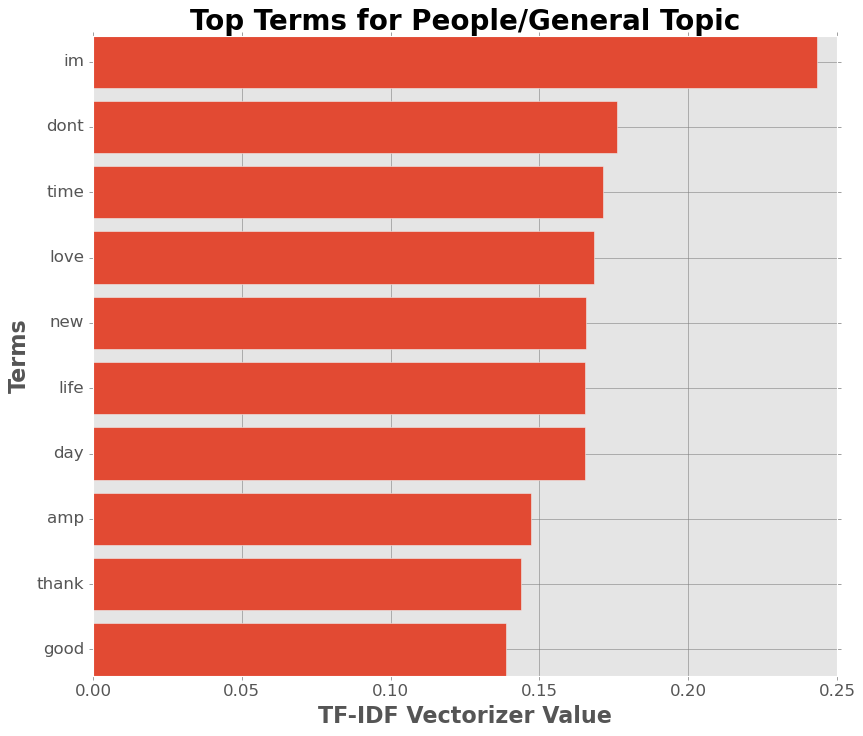

In [1027]:
fig = plt.figure(figsize = (12, 10))

plt.barh(y = df_general.Terms, width = df_general['People/General'], color = 'C0')

plt.grid(b = True, color ='grey',
        linestyle ='-', linewidth = 0.5,
        alpha = 1)

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
 
plt.xlabel("TF-IDF Vectorizer Value", fontsize = 20, fontweight = 'bold')
plt.ylabel("Terms", fontsize = 20, fontweight = 'bold')
plt.title("Top Terms for People/General Topic", fontsize = 25, fontweight = 'bold')

plt.show()

In [943]:
df_sneakers = df_nmf.sort_values('Sneakers', 
                   ascending = True)['Sneakers'][-11:-1].reset_index()
df_sneakers.columns = ['Terms', 'Sneakers']
df_sneakers.head()

,Terms,Sneakers
0,mid,0.155190
1,sneaker,0.156511
2,adidas,0.168541
3,sneakers,0.181413
4,upcoming,0.187455


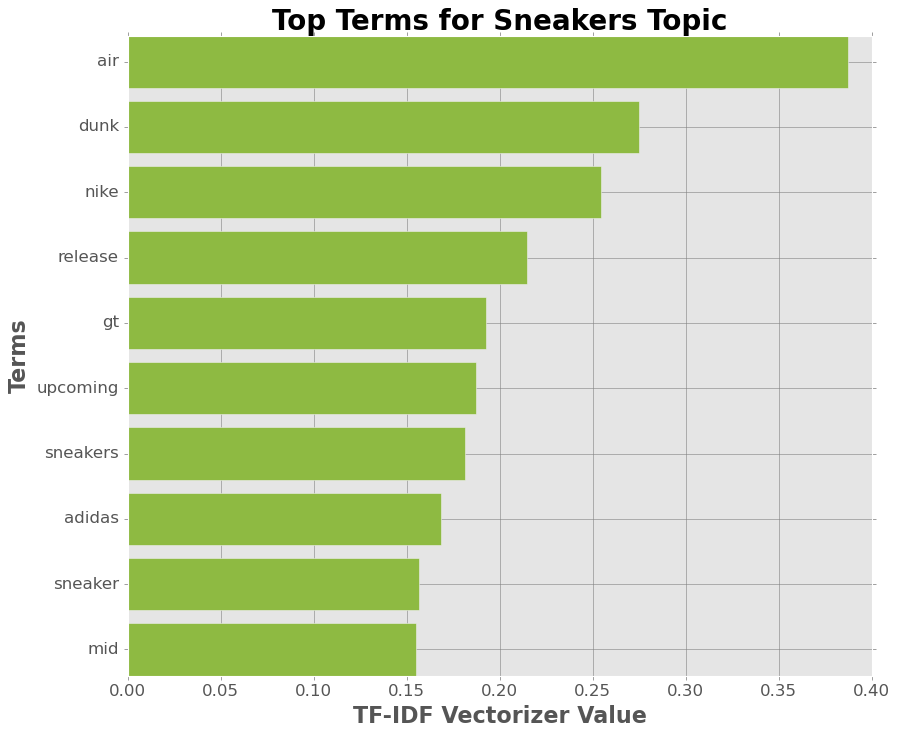

In [1038]:
fig = plt.figure(figsize = (12, 10))

plt.barh(y = df_sneakers.Terms, width = df_sneakers.Sneakers, color = 'C5')

plt.grid(b = True, color ='grey',
        linestyle ='-', linewidth = 0.5,
        alpha = 1)

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
 
plt.xlabel("TF-IDF Vectorizer Value", fontsize = 20, fontweight = 'bold')
plt.ylabel("Terms", fontsize = 20, fontweight = 'bold')
plt.title("Top Terms for Sneakers Topic", fontsize = 25, fontweight = 'bold')

plt.show()

In [945]:
df_crypto = df_nmf.sort_values('Crypto', 
                   ascending = True)['Crypto'][-11:-1].reset_index()
df_crypto.columns = ['Terms', 'Crypto']
df_crypto.head()

,Terms,Crypto
0,eth,0.112565
1,amp,0.119965
2,nfts,0.125537
3,market,0.127717
4,gm,0.146752


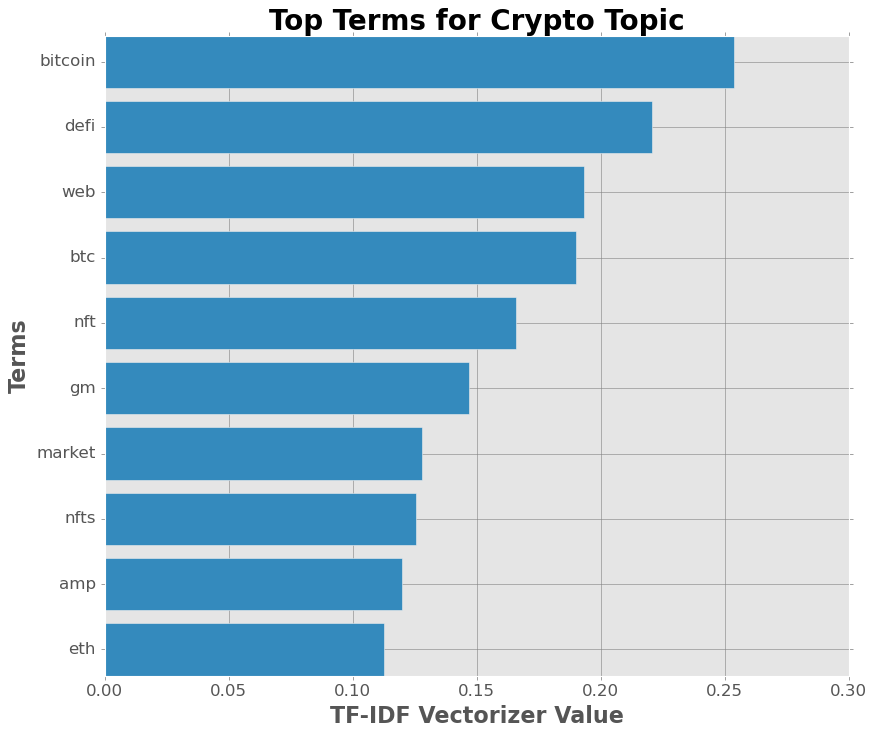

In [1035]:
fig = plt.figure(figsize = (12, 10))

plt.barh(y = df_crypto.Terms, width = df_crypto.Crypto, color = 'C1')

plt.grid(b = True, color ='grey',
        linestyle ='-', linewidth = 0.5,
        alpha = 1)

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
 
plt.xlabel("TF-IDF Vectorizer Value", fontsize = 20, fontweight = 'bold')
plt.ylabel("Terms", fontsize = 20, fontweight = 'bold')
plt.title("Top Terms for Crypto Topic", fontsize = 25, fontweight = 'bold')

plt.show()

## 3D Plot of Terms by Topic

Text(0.5, 0.92, 'Term-Topic Plot')

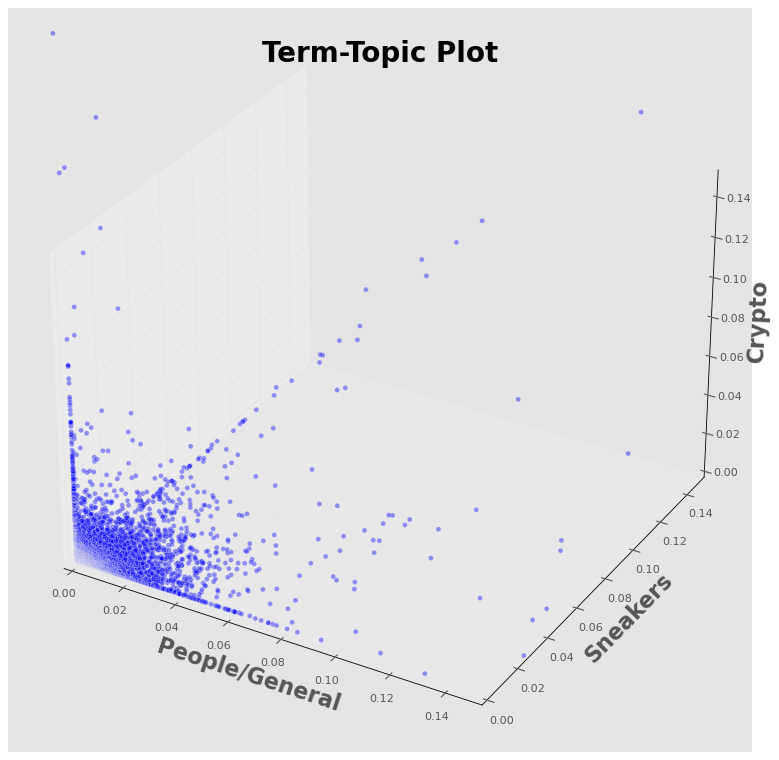

In [1045]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

x_coords = list(df_nmf['People/General'])
y_coords = list(df_nmf['Sneakers'])
z_coords = list(df_nmf['Crypto'])

ax.scatter(x_coords, y_coords, z_coords, alpha = 0.4)

plt.style.use('ggplot')

ax.set_xlim3d(0,0.15)
ax.set_ylim3d(0,0.15)
ax.set_zlim3d(0,0.15)

plt.xlabel('People/General', fontweight = 'bold', fontsize = 20)
plt.ylabel('Sneakers', fontweight = 'bold', fontsize = 20)
ax.set_zlabel('Crypto', fontweight = 'bold', fontsize = 20)
plt.title("Term-Topic Plot", fontsize = 25, fontweight = 'bold')

## 2D Scatter Plot of Sneakers and Crypto

(array([-0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

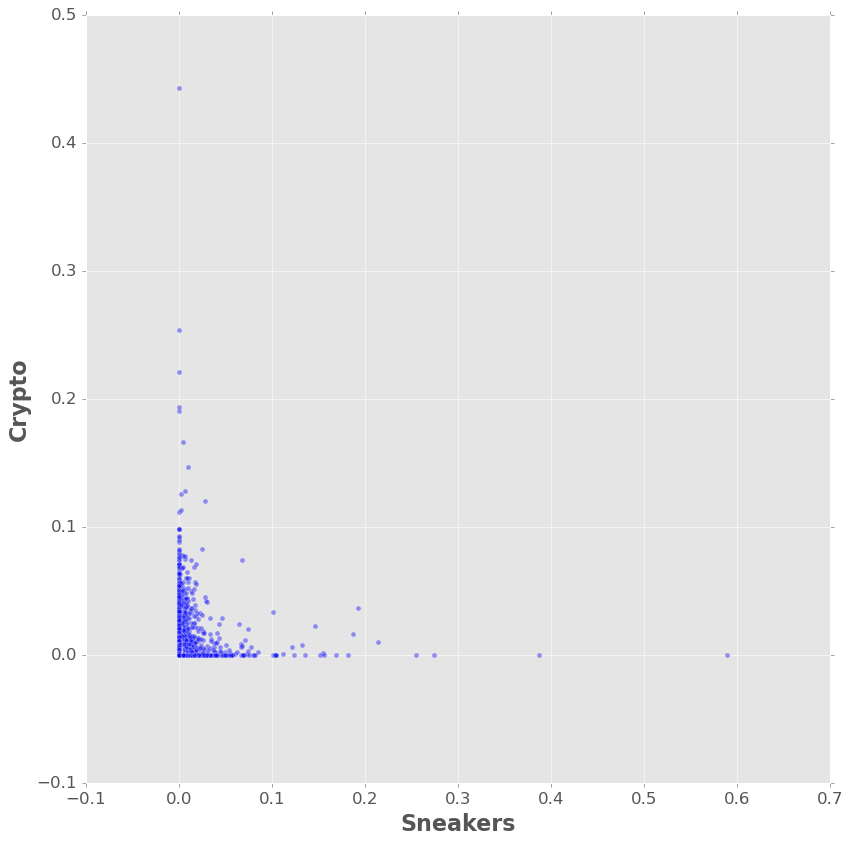

In [948]:
plt.style.use('ggplot')

fig = plt.figure(figsize=(12, 12))

x_coords = list(df_nmf['Sneakers'])
y_coords = list(df_nmf['Crypto'])

plt.scatter(x = x_coords, y = y_coords, alpha =0.4)

plt.xlabel('Sneakers', fontsize = 20, fontweight = 'bold')
plt.ylabel('Crypto', fontsize = 20, fontweight = 'bold')

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

## Recommender System w/ Cosine Similarity

In [949]:
from sklearn.metrics.pairwise import cosine_similarity

In [950]:
# Using nmf_tfidf topic model

df_doc_term_tfidf = pd.DataFrame(nmf_tfidf.transform(doc_term_tfidf))
df_doc_term_tfidf.columns = ['People/General', 'Sneakers', 'Crypto']
df_doc_term_tfidf.index = df.Name
df_doc_term_tfidf = df_doc_term_tfidf.reset_index()
df_doc_term_tfidf.head()

,Name,People/General,Sneakers,Crypto
0,JustFreshAlerts,0.004075,0.099609,0.002767
1,Sneaker Links,0.000000,0.576921,0.000000
2,JF Kicks Notify,0.000000,0.325981,0.000533
3,SneakerAlert,0.000000,0.629591,0.000000
4,Josh Ong,0.052147,0.036071,0.218072


In [951]:
cosine_similarity([nmf_tfidf.transform(doc_term_tfidf)[0]], 
                  [nmf_tfidf.transform(doc_term_tfidf)[1]])

array([[0.99877972]])

In [987]:
def cosine_recommender(matrix, user_index):
    result = []
    for idx, user in enumerate(matrix):
        if idx == user_index:
            continue
        else:
            result.append([df.Name[idx], cosine_similarity([matrix[user_index]], [matrix[idx]])[0][0]])
    return pd.DataFrame(result)

user_index = df[df.Name == 'Avery Peterson'].index[0]
matrix = nmf_tfidf.transform(doc_term_tfidf)
df_result = cosine_recommender(matrix, user_index)
df_result.columns = ['Name', 'Cosine_Score']
df_final_rec = df_result.sort_values('Cosine_Score', ascending = False).head(10)
df_final_rec

,Name,Cosine_Score
40,Andrew Badr,0.929907
86,sadalex.eth,0.918277
92,Sam Spratt,0.911118
68,Research.Bet,0.900806
25,🟠 Mike Lucchesi,0.898398
28,Iman Gadzhi,0.897841
62,Tim Denning 🇦🇺 | Millionaire Writing Habits,0.897649
19,Greg Egan,0.892423
13,Gentry Humphrey,0.891625
32,Adele Bedford 💙,0.885874


## 3D Scatter Plot Docs by Topic

In [1000]:
df_coll_topics = pd.DataFrame()

df_coll_topics = pd.concat([df_coll_topics, 
                            df_doc_term_tfidf[df_doc_term_tfidf.Name=='Andrew Badr']])
df_coll_topics = pd.concat([df_coll_topics, 
                            df_doc_term_tfidf[df_doc_term_tfidf.Name=='sadalex.eth']])
df_coll_topics = pd.concat([df_coll_topics, 
                            df_doc_term_tfidf[df_doc_term_tfidf.Name=='Sam Spratt']])
df_coll_topics = pd.concat([df_coll_topics, 
                            df_doc_term_tfidf[df_doc_term_tfidf.Name=='Research.Bet']])
df_coll_topics = pd.concat([df_coll_topics, 
                            df_doc_term_tfidf[df_doc_term_tfidf.Name=='🟠 Mike Lucchesi']])
df_coll_topics = pd.concat([df_coll_topics, 
                            df_doc_term_tfidf[df_doc_term_tfidf.Name=='Iman Gadzhi']])
df_coll_topics = pd.concat([df_coll_topics, 
                            df_doc_term_tfidf[df_doc_term_tfidf.Name=='Tim Denning 🇦🇺 | Millionaire Writing Habits']])
df_coll_topics = pd.concat([df_coll_topics, 
                            df_doc_term_tfidf[df_doc_term_tfidf.Name=='Greg Egan']])
df_coll_topics = pd.concat([df_coll_topics, 
                            df_doc_term_tfidf[df_doc_term_tfidf.Name=='Gentry Humphrey']])
df_coll_topics = pd.concat([df_coll_topics, 
                            df_doc_term_tfidf[df_doc_term_tfidf.Name=='Adele Bedford 💙']])


df_coll_topics

,Name,People/General,Sneakers,Crypto
41,Andrew Badr,0.154204,0.014745,0.121596
87,sadalex.eth,0.146049,0.005899,0.094091
93,Sam Spratt,0.055961,0.001186,0.032964
69,Research.Bet,0.089201,0.000000,0.047274
26,🟠 Mike Lucchesi,0.201280,0.000000,0.099978
29,Iman Gadzhi,0.165398,0.007638,0.059194
63,Tim Denning 🇦🇺 | Millionaire Writing Habits,0.087933,0.000000,0.042908
20,Greg Egan,0.185978,0.000241,0.080762
14,Gentry Humphrey,0.130781,0.074014,0.006723
33,Adele Bedford 💙,0.163674,0.000000,0.064082


In [1004]:
df_minus_coll_topics = df_doc_term_tfidf.drop(list(df_coll_topics.index))
df_minus_coll_topics

,Name,People/General,Sneakers,Crypto
0,JustFreshAlerts,0.004075,0.099609,0.002767
1,Sneaker Links,0.000000,0.576921,0.000000
2,JF Kicks Notify,0.000000,0.325981,0.000533
3,SneakerAlert,0.000000,0.629591,0.000000
4,Josh Ong,0.052147,0.036071,0.218072
...,...,...,...,...
101,CornerstoneDAO,0.000000,0.000000,0.130807
102,Endlesss,0.024849,0.001621,0.157286
103,Connect3,0.000000,0.000000,0.186156
104,imnotArt🧱,0.004755,0.013745,0.153717


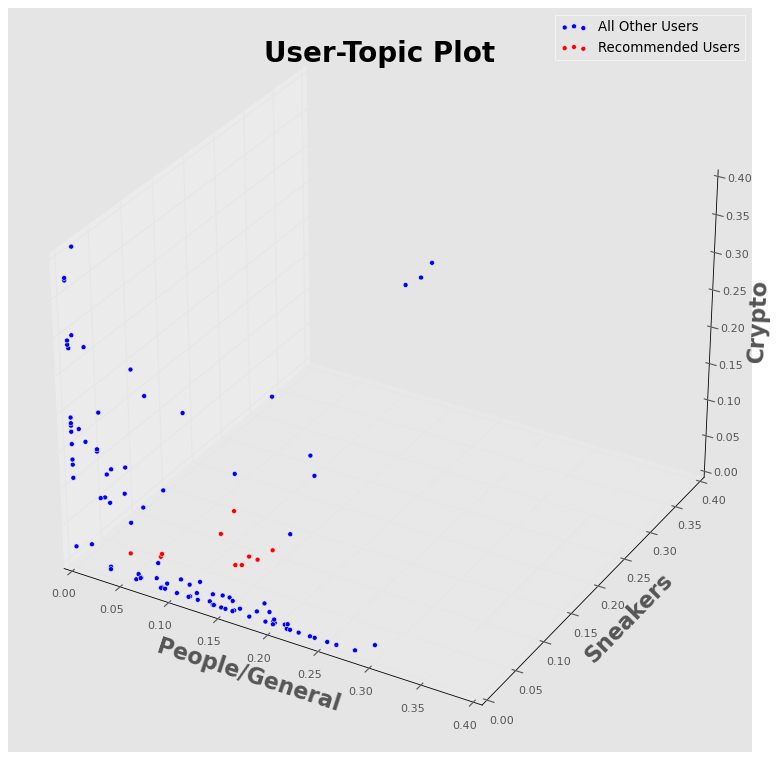

In [1043]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

x_coords = list(df_minus_coll_topics['People/General'])
y_coords = list(df_minus_coll_topics['Sneakers'])
z_coords = list(df_minus_coll_topics['Crypto'])

other_users = ax.scatter(x_coords, y_coords, z_coords, alpha = 1, c = 'blue')

x_coords_rec = list(df_coll_topics['People/General'])
y_coords_rec = list(df_coll_topics['Sneakers'])
z_coords_rec = list(df_coll_topics['Crypto'])

rec_users = ax.scatter(x_coords_rec, y_coords_rec, z_coords_rec, alpha = 1, c = 'red')

plt.style.use('ggplot')

ax.set_xlim3d(0,0.4)
ax.set_ylim3d(0,0.4)
ax.set_zlim3d(0,0.4)

plt.xlabel('People/General', fontweight = 'bold', fontsize = 20)
plt.ylabel('Sneakers', fontweight = 'bold', fontsize = 20)
ax.set_zlabel('Crypto', fontweight = 'bold', fontsize = 20)
plt.title("User-Topic Plot", fontsize = 25, fontweight = 'bold')

plt.legend(['All Other Users','Recommended Users'])

## 2D Scatter Plot Sneakers and Crypto

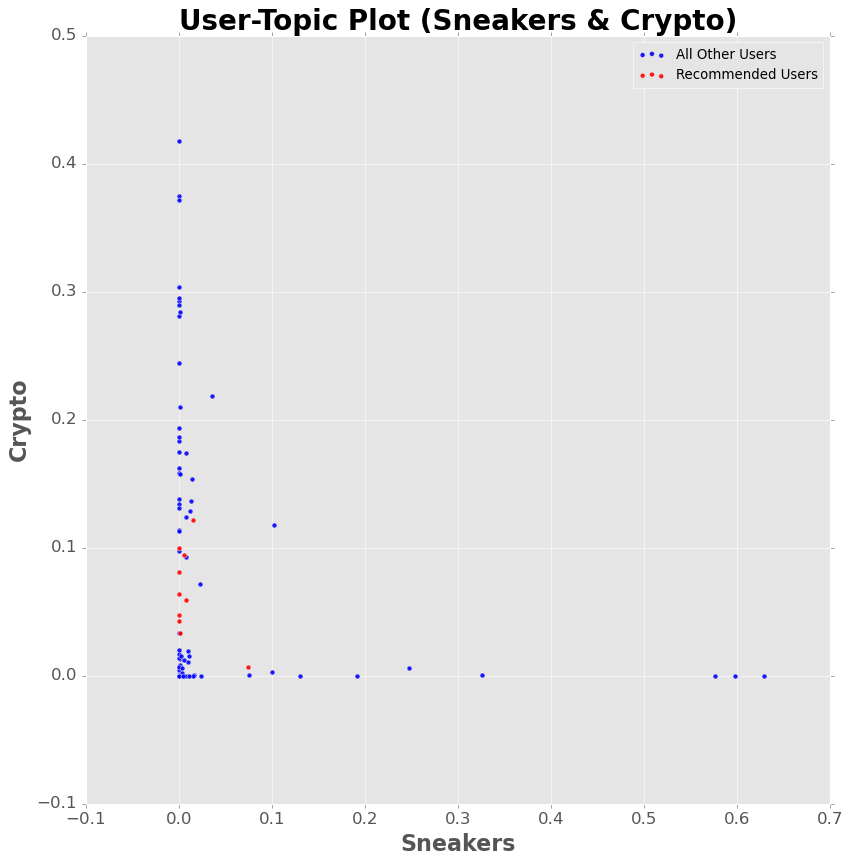

In [1044]:
plt.style.use('ggplot')

fig = plt.figure(figsize=(12, 12))

x_coords = list(df_minus_coll_topics['Sneakers'])
y_coords = list(df_minus_coll_topics['Crypto'])

plt.scatter(x = x_coords, y = y_coords, alpha =0.9, c = 'blue')
                
x_coords_rec = list(df_coll_topics['Sneakers'])
y_coords_rec = list(df_coll_topics['Crypto'])

plt.scatter(x = x_coords_rec, y = y_coords_rec, alpha =0.9, c = 'red')

plt.xlabel('Sneakers', fontsize = 20, fontweight = 'bold')
plt.ylabel('Crypto', fontsize = 20, fontweight = 'bold')

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

plt.title("User-Topic Plot (Sneakers & Crypto)", fontsize = 25, fontweight = 'bold')

plt.legend(['All Other Users','Recommended Users'])